In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [ ]:
os.chdir('C:/Users/zacha/Documents/GitHub/plymouth-university-proj518')
print(os.getcwd())

In [3]:
df = pd.read_csv('data/global_wrecks_and_obstructions.csv')

admiralty_df = pd.read_csv('data/UKHO ADMIRALTY bathymetry UK east coast.csv')

print(df.head())

c:\Users\zacha\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


   wreck_id   wreck_category obstruction_category status  classification  \
0     88628  dangerous wreck                  NaN    NaN             NaN   
1     88624  dangerous wreck                  NaN    NaN             NaN   
2     31299  dangerous wreck                  NaN    NaN             NaN   
3     88594              NaN                  NaN    NaN             NaN   
4      8409              NaN          foul ground    NaN             NaN   

                 position     latitude   longitude horizontal_datum limits  \
0     55 27.34 N,3 34.6 E   55 27.34 N    3 34.6 E            WGD 2    NaN   
1    55 25.64 N,3 20.41 E   55 25.64 N   3 20.41 E            WGD 2    NaN   
2  55 21.861 N,3 40.623 E  55 21.861 N  3 40.623 E            WGD 2    NaN   
3    55 35.35 N,3 21.38 E   55 35.35 N   3 21.38 E            WGD 2    NaN   
4  53 22.666 N,2 58.764 W  53 22.666 N  2 58.764 W            WGD 2    NaN   

   ...   original_sensor      last_sensor  original_detection_year  \
0  .

In [4]:
# convert lat and long to numerical
def transform(x):
    # e.g.: '3 3.4 N' to coords 
    y = x.split(' ')
    return float(y[0]) + (float(y[1])/100)

df['latitude'] = df['latitude'].apply(lambda x: transform(x))
df['longitude'] = df['longitude'].apply(lambda x: transform(x))

In [5]:
lat_range = (53.486257927, 54.1)
lon_range = (0.5, 2.5571098)

# filter dataset to within lat and long
df = df[(df['latitude'] >= lat_range[0]) & (df['latitude'] <= lat_range[1]) & (df['longitude'] >= lon_range[0]) & (df['longitude'] <= lon_range[1])]

In [6]:
# save contrained dataset
df.to_csv('data/UK east coast wrecks and obstructions.csv')

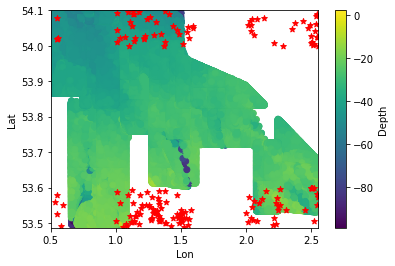

In [7]:
# plot contrained to search space
fig = plt.figure()
ax = fig.add_subplot(111)

points = np.array(df[['longitude', 'latitude']])

map = ax.scatter(admiralty_df['Lon'], admiralty_df['Lat'], c=admiralty_df['Depth'], cmap='viridis')
ax.scatter(points[:, 0], points[:, 1], c='r', marker='*')

ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# add a legend indicating the depth of each point
cbar = fig.colorbar(map, ax=ax)
cbar.set_label('Depth')

# set x and y limits
ax.set_xlim(lon_range)
ax.set_ylim(lat_range)

plt.show()